In [274]:
import numpy as np
import scipy as sp

In [275]:
import pyaudio
import numpy as np
import keyboard
import matplotlib.pyplot as plt
from scipy.signal import square, sawtooth

# Constants
SAMPLE_RATE = 44100  # Sampling rate
DURATION = 0.5     # Duration of each note
VOLUME = 0.5         # Volume of the sound
CHUNK = 1024 * 4

# Frequencies of notes (A4 = 440 Hz)
NOTE_FREQUENCIES = {
    'z': 261.63,  # C4
    's': 277.18,  # C#4/Db4
    'x': 293.66,  # D4
    'd': 311.13,  # D#4/Eb4
    'c': 329.63,  # E4
    'v': 349.23,  # F4
    'g': 369.99,  # F#4/Gb4
    'b': 392.00,  # G4
    'h': 415.30,  # G#4/Ab4
    'n': 440.00,  # A4
    'j': 466.16,  # A#4/Bb4
    'm': 493.88,  # B4
    ',': 523.25,  # C5
    'q': 523.25,  # C5
    '2': 554.37,  # C#5/Db5
    'w': 587.33,  # D5
    '3': 622.25,  # D#5/Eb5
    'e': 659.25,  # E5
    'r': 698.46,  # F5
    '5': 739.99,  # F#5/Gb5
    't': 783.99,  # G5
    '6': 830.61,  # G#5/Ab5
    'y': 880.00,  # A5
    '7': 932.33,  # A#5/Bb5
    'u': 987.77,  # B5
    'i': 1046.50, # C6
}


# Generate basic waves
def generate_sine_wave(frequency,phase =0):
    t = np.linspace(0, DURATION, int(SAMPLE_RATE * DURATION), False)
    wave = np.sin(2 * np.pi * frequency * t + phase)
    return t, wave
def generate_triangle_wave(frequency):
    t = np.linspace(0, DURATION, int(SAMPLE_RATE * DURATION), False)
    wave = sawtooth(2 * np.pi * frequency * t, 0.5)
    return t, wave

def generate_square_wave(frequency):
    t = np.linspace(0, DURATION, int(SAMPLE_RATE * DURATION), False)
    wave = square(2 * np.pi * frequency * t)
    return t, wave

def generate_sawtooth_wave(frequency):
    t = np.linspace(0, DURATION, int(SAMPLE_RATE * DURATION), False)
    wave = sawtooth(2 * np.pi * frequency * t)
    return t, wave
def generate_ramp():
    Ramp_samples = int(SAMPLE_RATE * DURATION)
    return np.linspace(0, 1, Ramp_samples)
def generate_invramp():
    Ramp_samples = int(SAMPLE_RATE * DURATION)
    return np.linspace(1, 0, Ramp_samples)

In [276]:
def apply_fade_out(wave,fade_duration, sample_rate=SAMPLE_RATE, duration=DURATION):
    fade_samples = int(sample_rate * fade_duration)
    total_samples = len(wave)
    
    if fade_samples > total_samples:
        raise ValueError("Fade duration is longer than the total duration of the wave.")
    
    fade_curve = np.linspace(1, 0, fade_samples)
    wave[-fade_samples:] *= fade_curve
    return wave

In [277]:
import numpy as np
import matplotlib.pyplot as plt
def myFMMod(t,inputWave,CarrierWaveFreq,FreqSens):
    integral_of_m_t = np.cumsum(inputWave) / SAMPLE_RATE
    return generate_sine_wave(CarrierWaveFreq,integral_of_m_t* 2 * np.pi * FreqSens)

change the wave form here

In [278]:
#use to select a wave form :
# generate_sine_wave
# generate_triangle_wave
# generate_sawtooth_wave
# generate_square_wave

def generate_harmonies(baseFrequency):
    #adding simple effect
    t, wave = generate_triangle_wave(baseFrequency)
    t, harmony1 = generate_triangle_wave(baseFrequency *2)#one octive
    t, harmony2 = generate_triangle_wave(baseFrequency *1.5)#one 5th
    t, harmony3 = generate_triangle_wave(baseFrequency *3)#one 12th
    t, harmony4 = generate_triangle_wave(baseFrequency *4)#two octives
    wave = wave + 0.4 * harmony1 + 0.2 * harmony2+0.1 * harmony3+0.01 * harmony4
    """"
    plt.xlim(0,0.01)
    plt.plot(t, wave)
    plt.show()
    """
    return t,wave

In [279]:
# Play sound
def play_sound(stream, frequency):

    t, wave = generate_triangle_wave(4)
    t,invRamp =  generate_sawtooth_wave(10)
    t,wv = generate_sine_wave(5)
    wv = myFMMod(t,invRamp,0,5)[1]
    plt.plot(t,invRamp)
    plt.xlim(0,1)
    plt.show()
    plt.plot(t,wv)
    plt.xlim(0,1)
    plt.show()
    wave = myFMMod(t,wv,0,frequency)
    waveh1 =  myFMMod(t,wv,0,frequency * 2)
    waveh2 =  myFMMod(t,wv,0,frequency * 1.5)
    """
    t,wv = generate_sine_wave(5)
    wave = myFMMod(t,temp,wave,10)
    """
    wave = np.abs(wave)
    waveh1 = np.abs(waveh1)
    waveh2 = np.abs(waveh2)
    wave = wave[1] + 0.2 * waveh1[1] + 0.4 * waveh2[1]
    plt.plot(t,wave)
    plt.xlim(0,0.05)
    plt.show()
    
    
    samples = (VOLUME * wave).astype(np.float32).tobytes()
    stream.write(samples)
    return t, wave

Run all to start and type a character in the terminal to make a tone

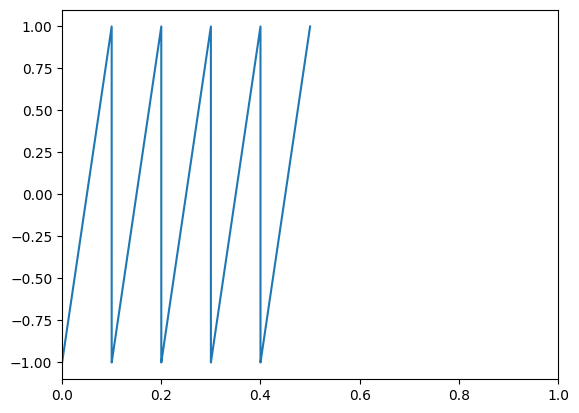

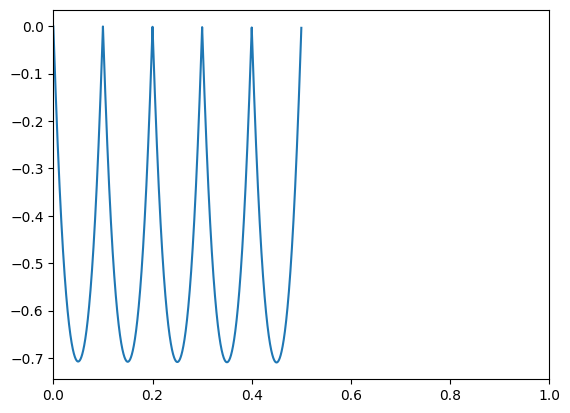

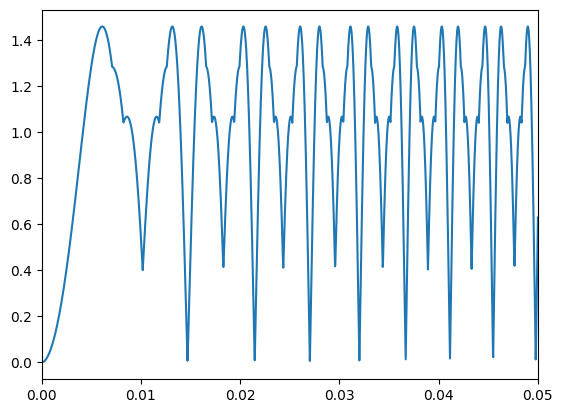

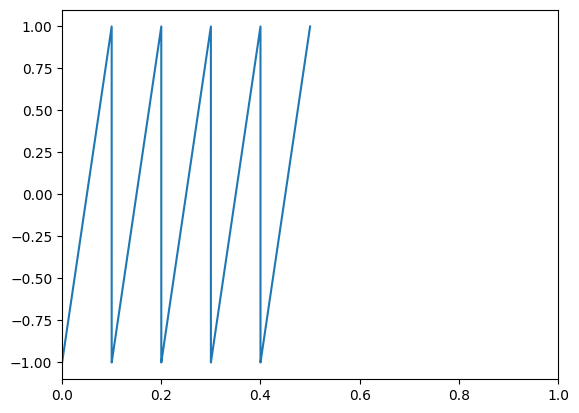

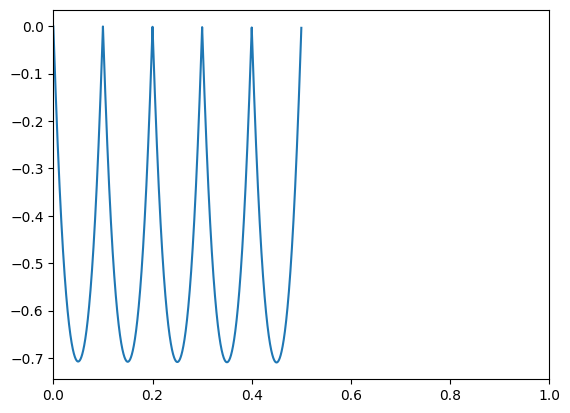

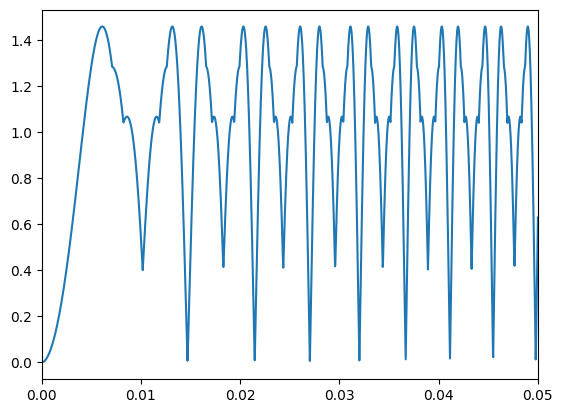

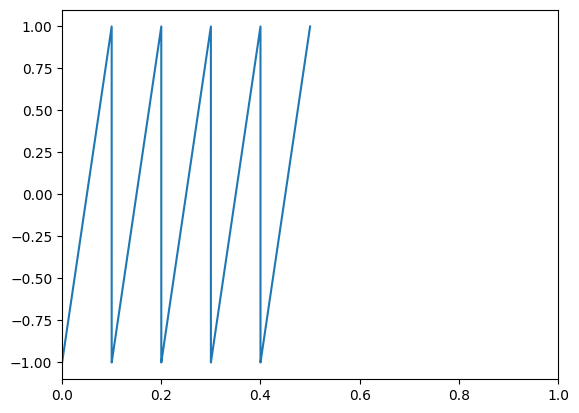

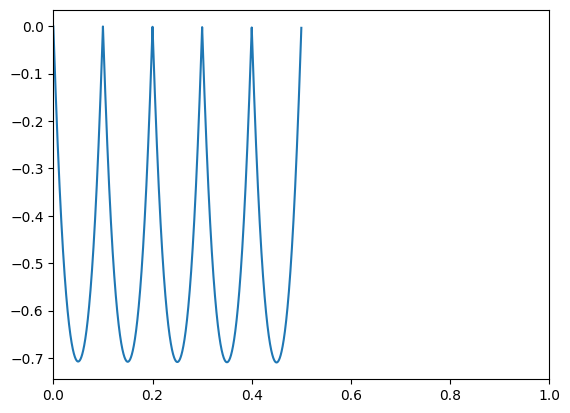

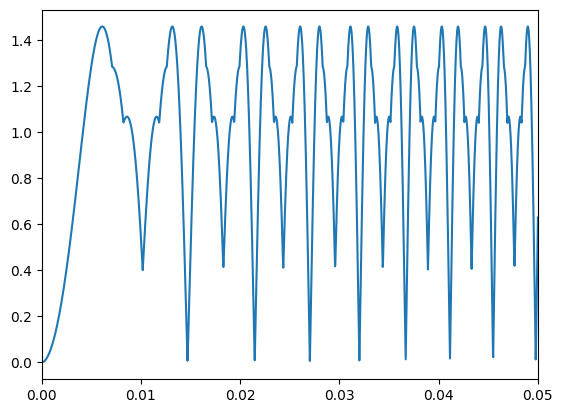

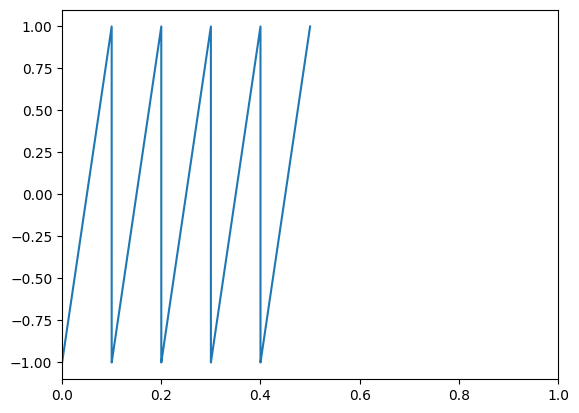

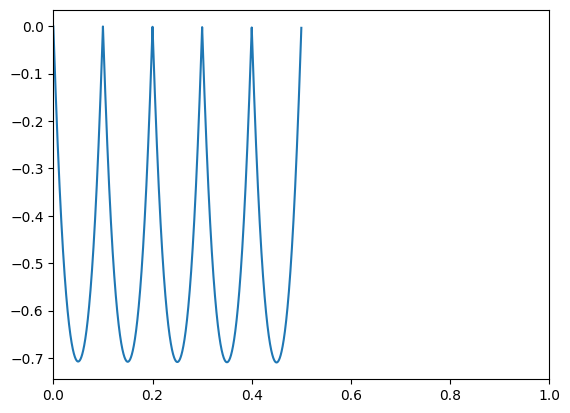

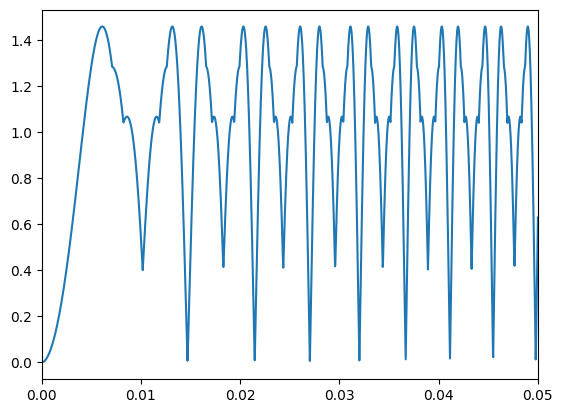

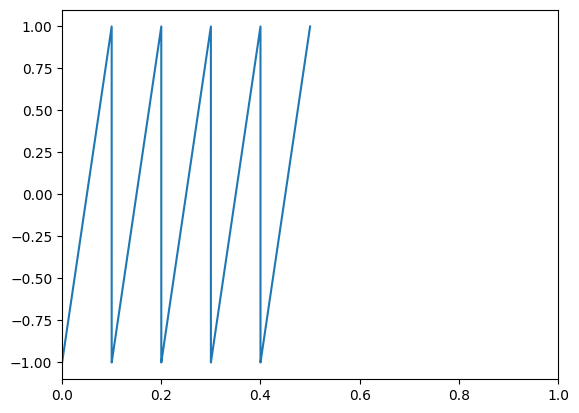

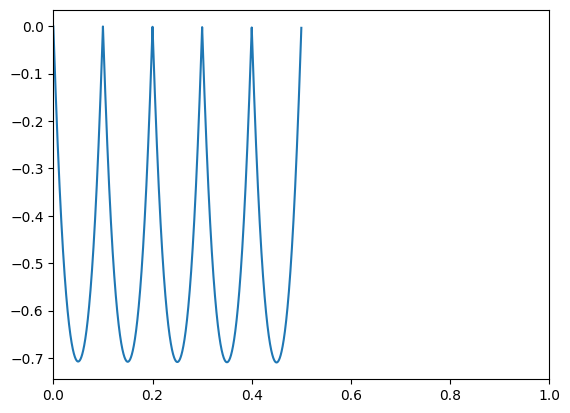

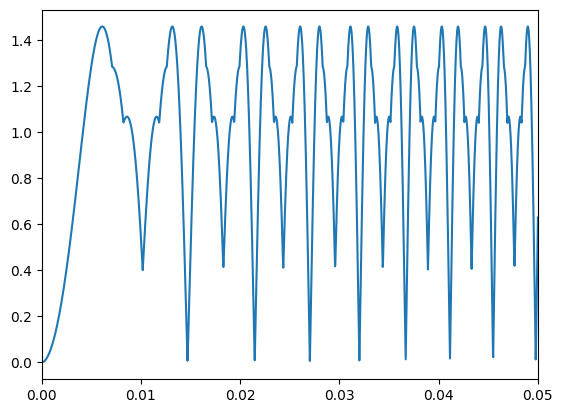

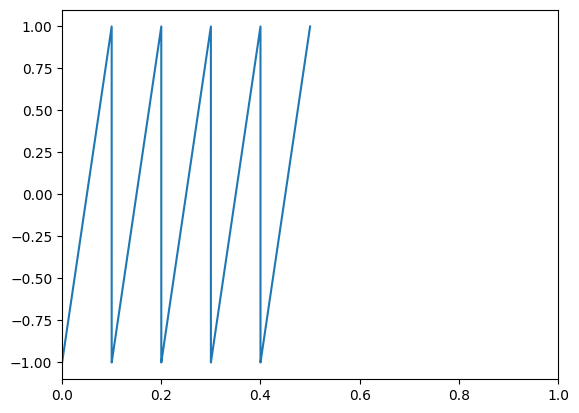

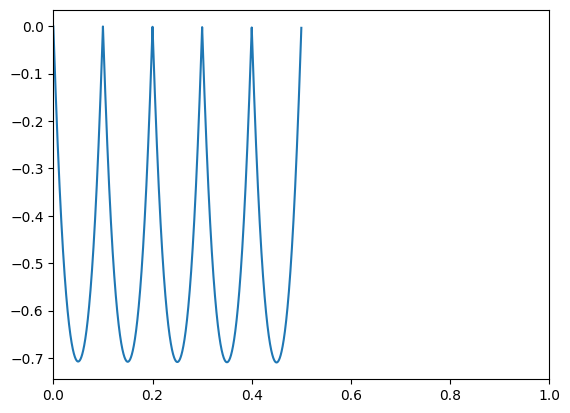

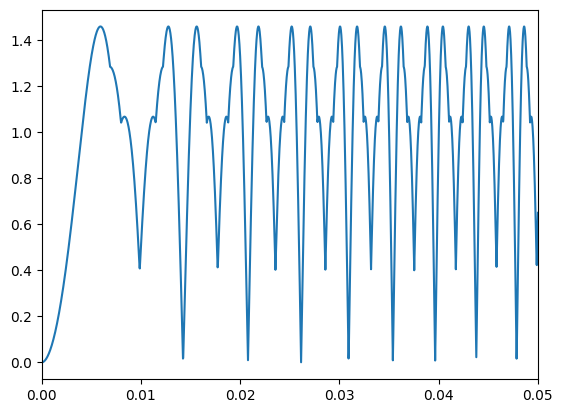

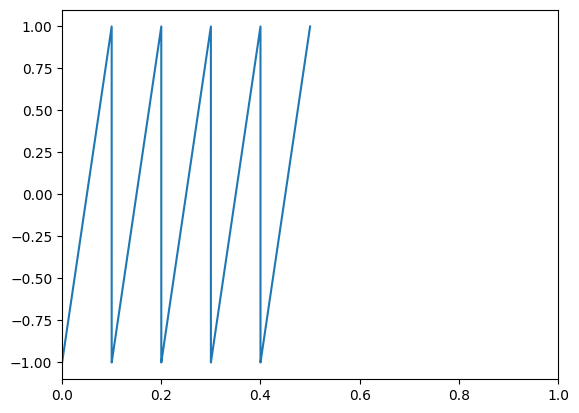

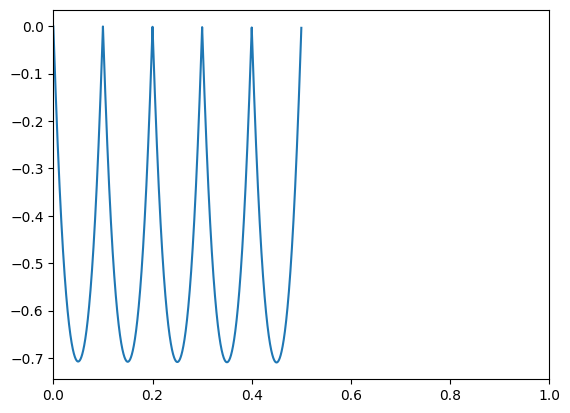

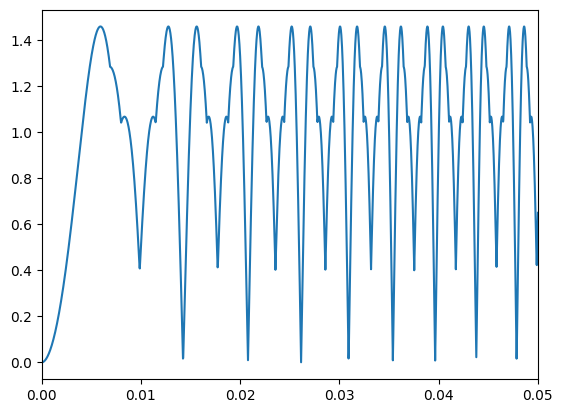

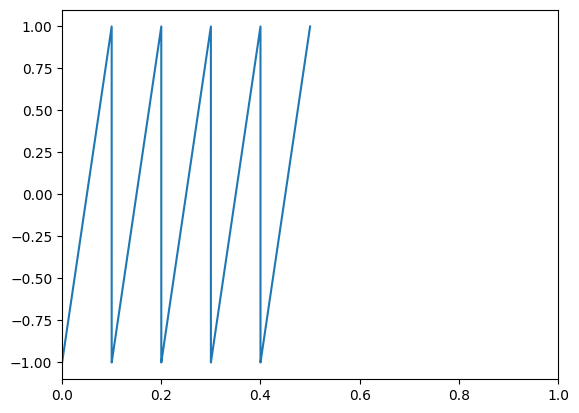

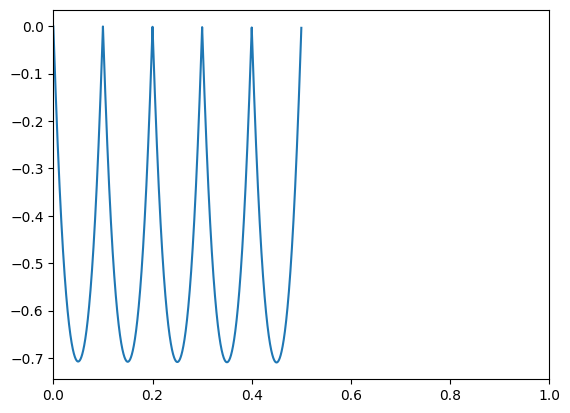

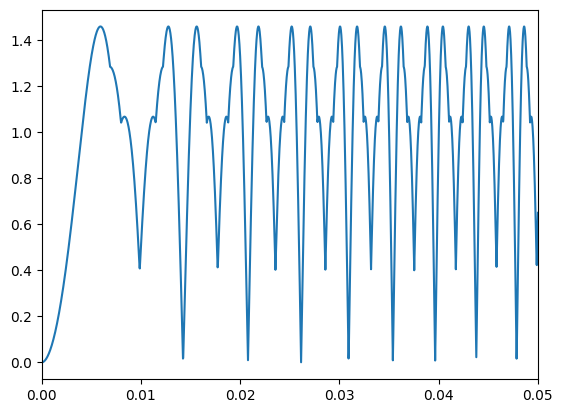

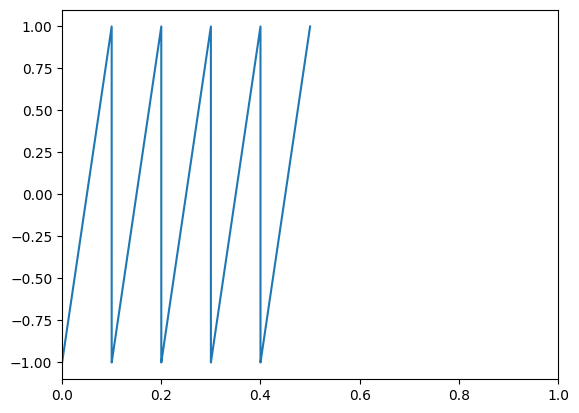

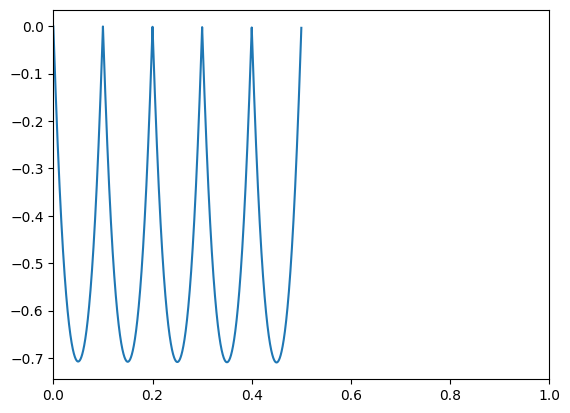

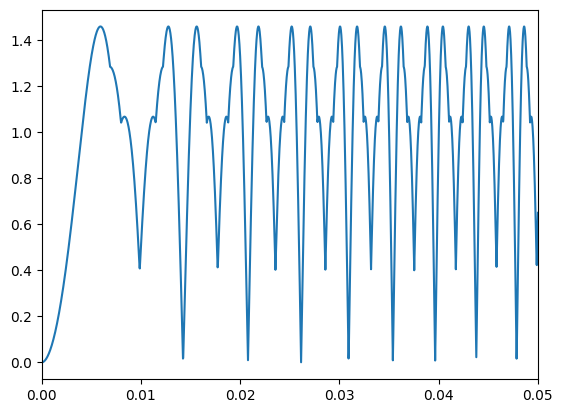

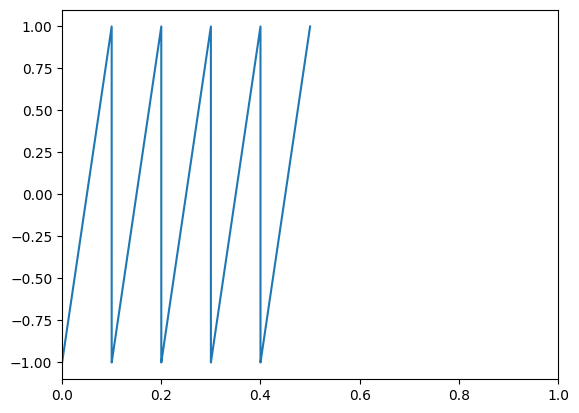

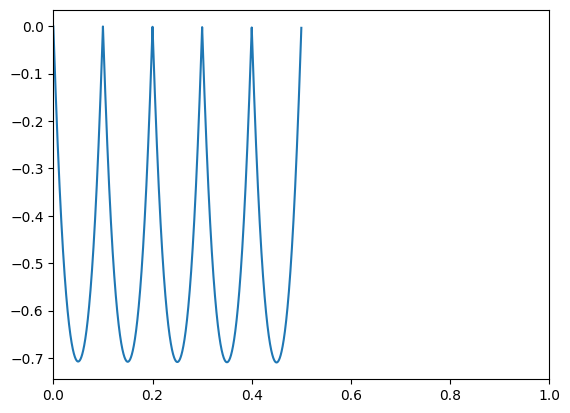

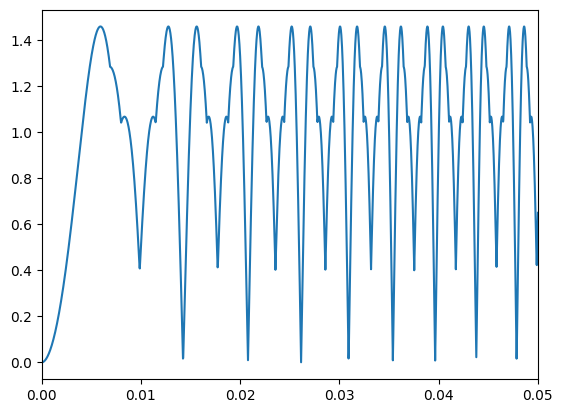

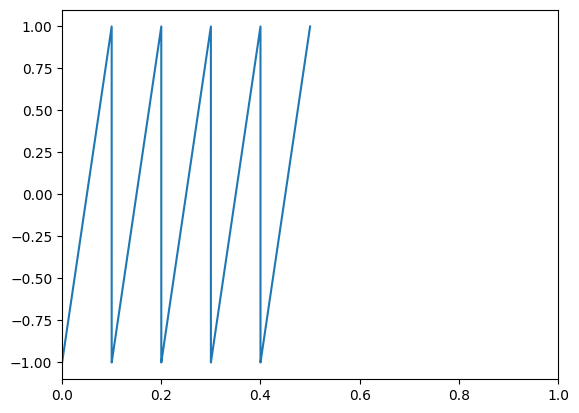

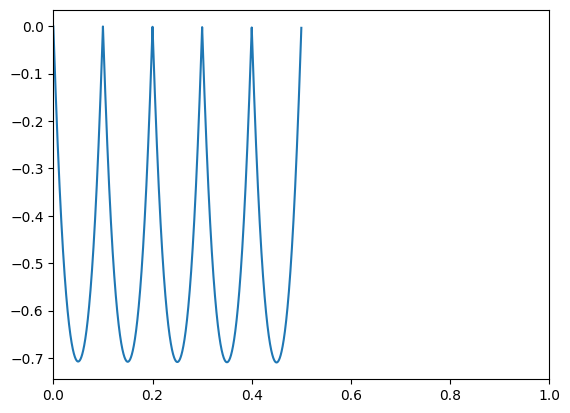

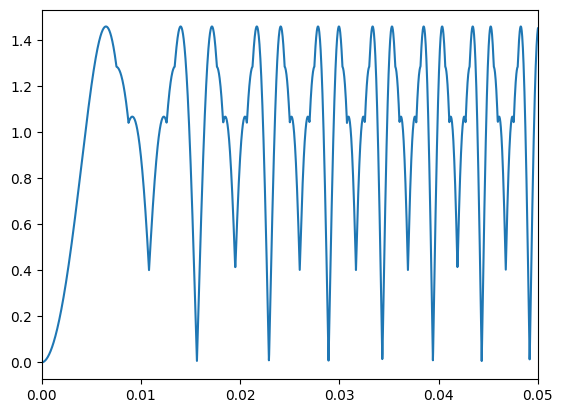

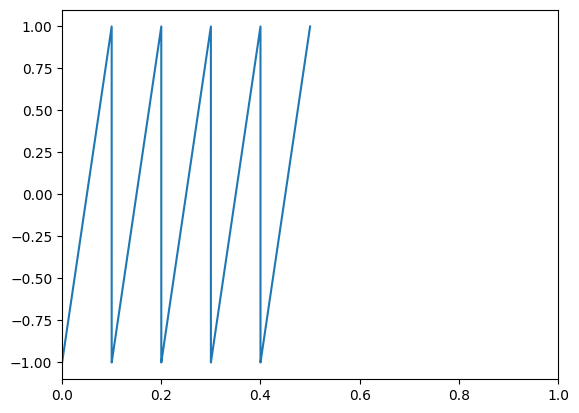

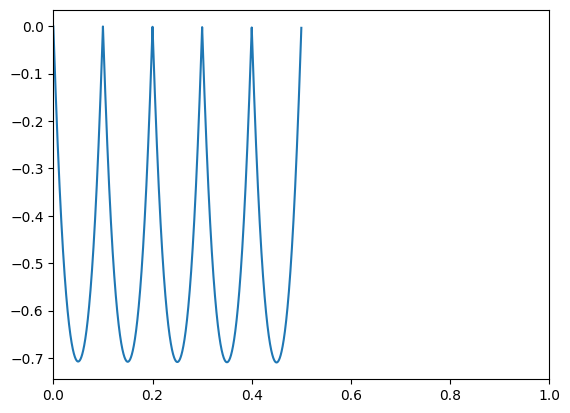

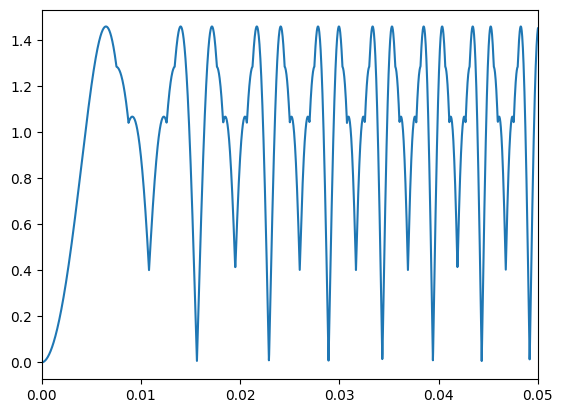

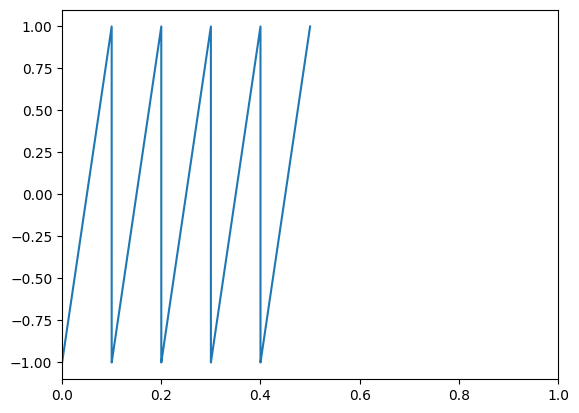

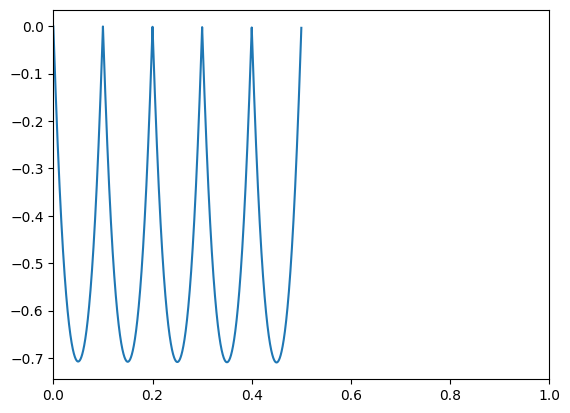

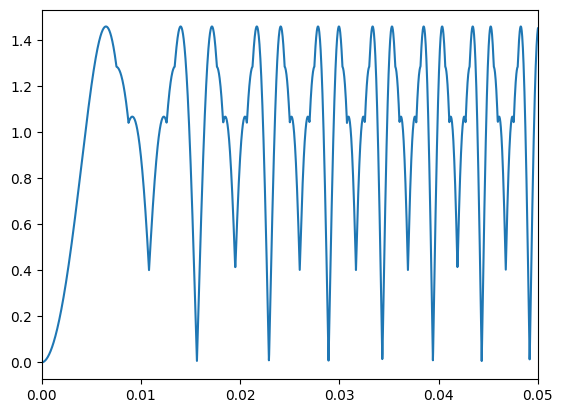

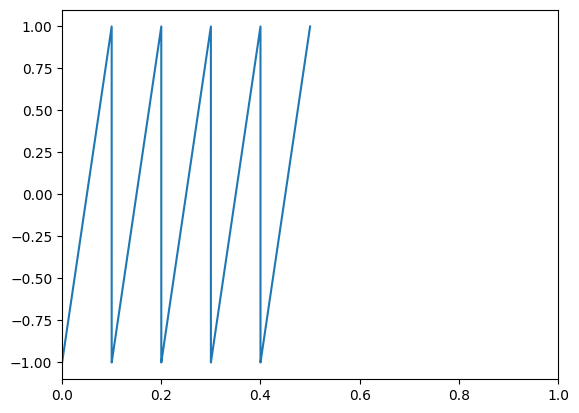

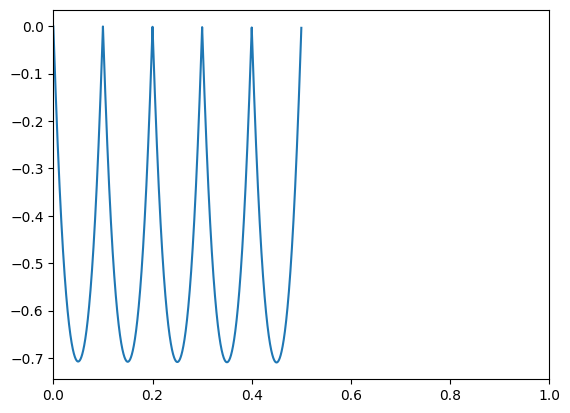

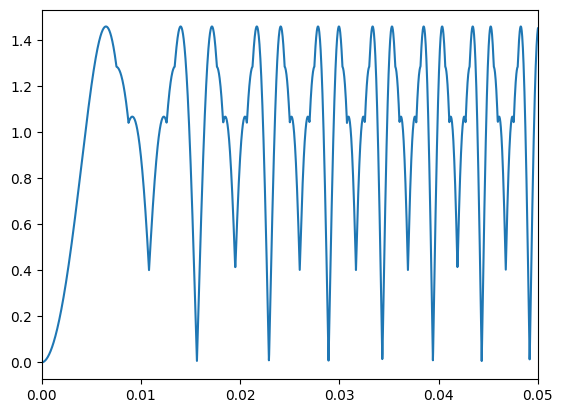

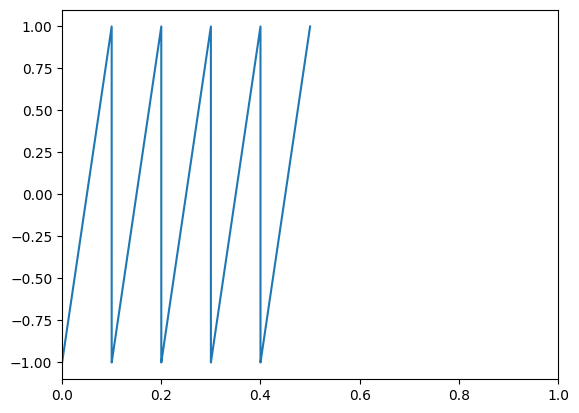

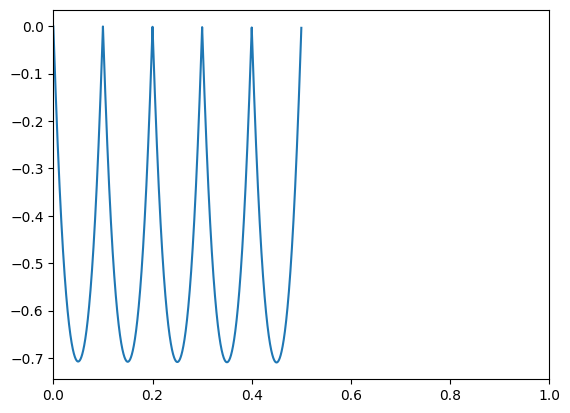

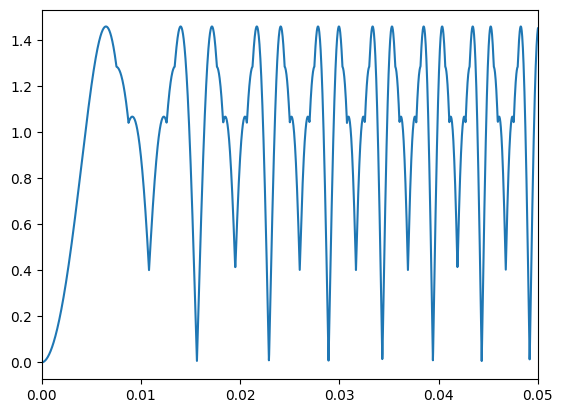

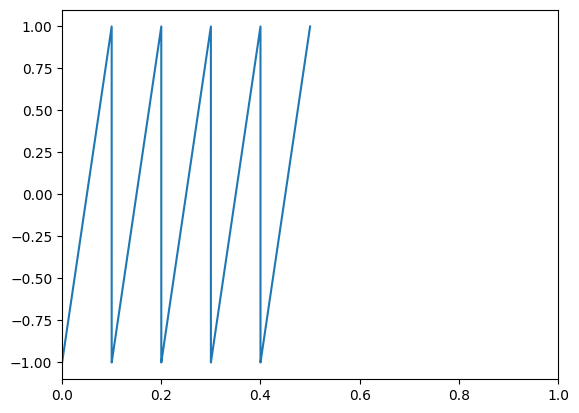

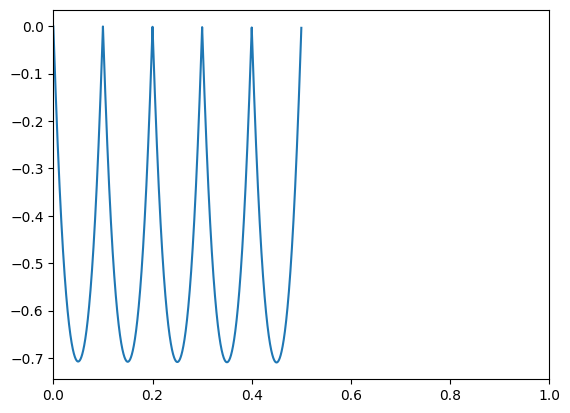

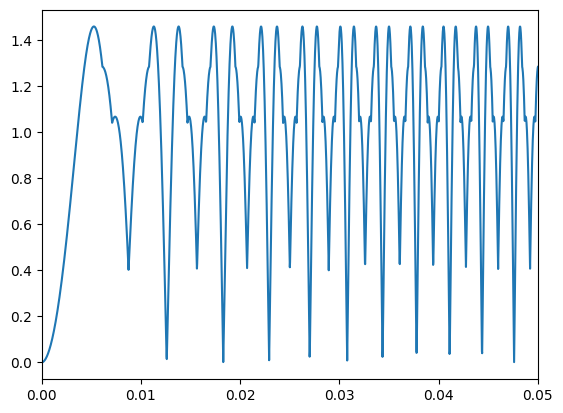

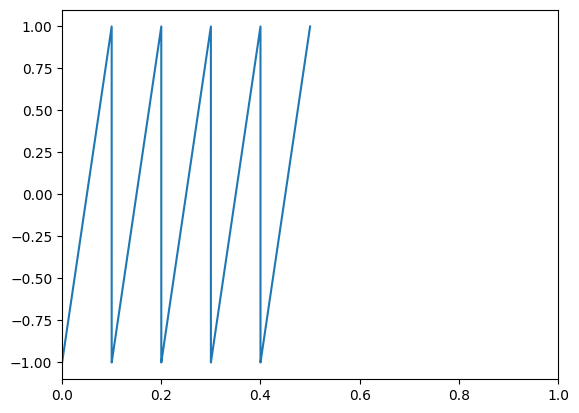

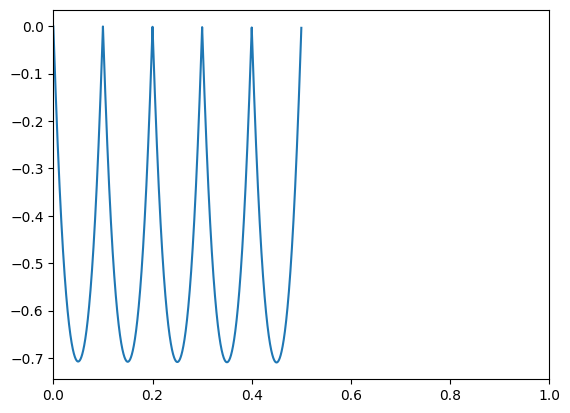

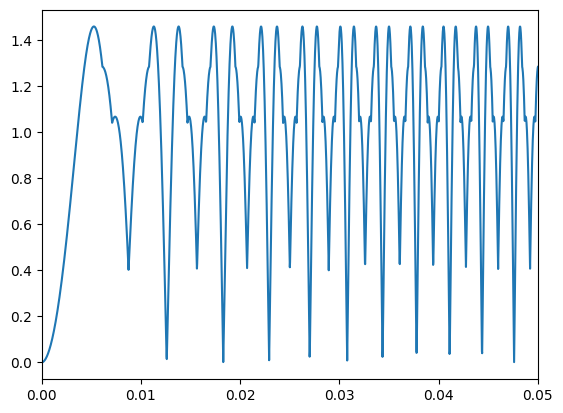

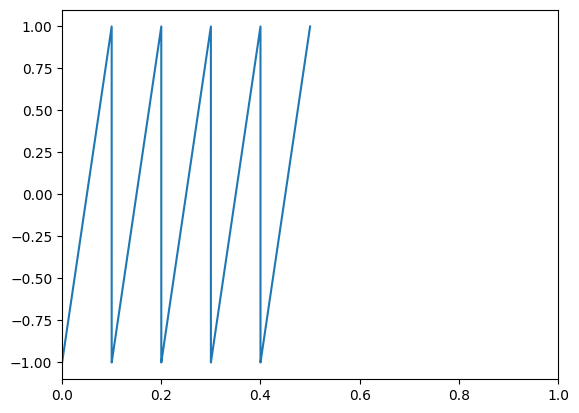

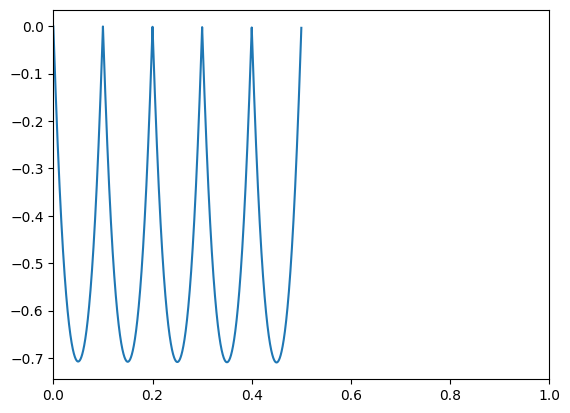

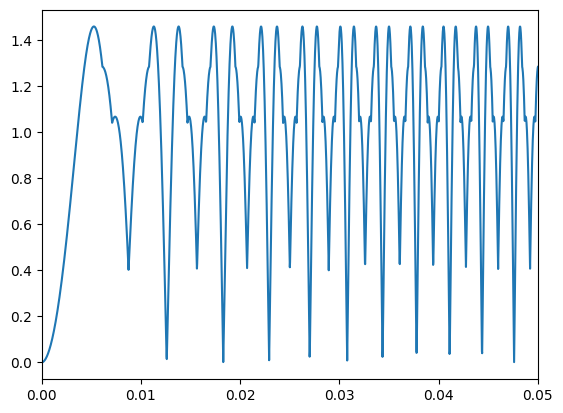

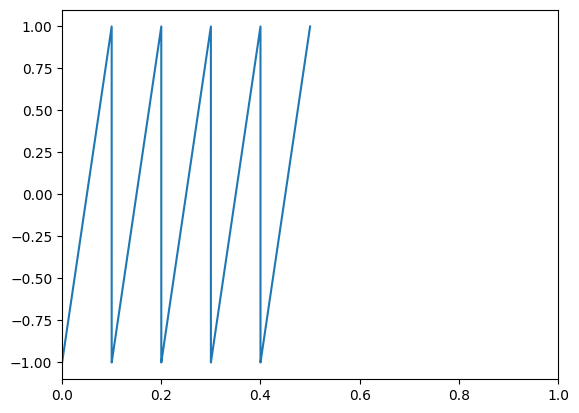

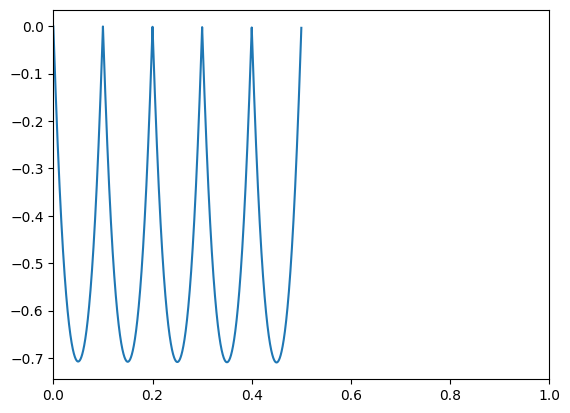

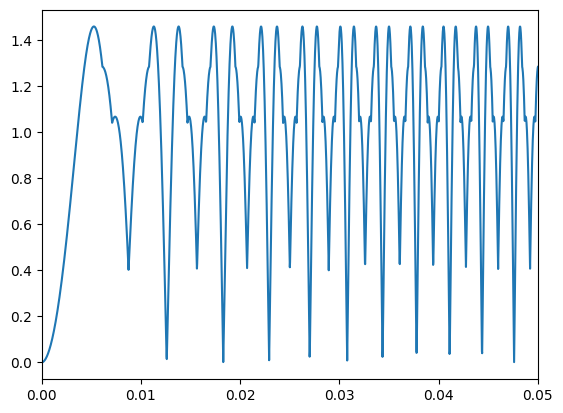

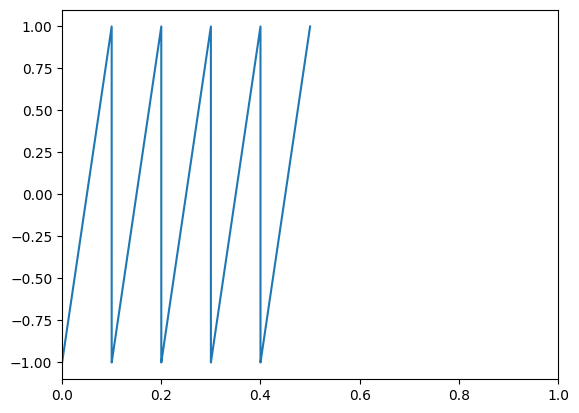

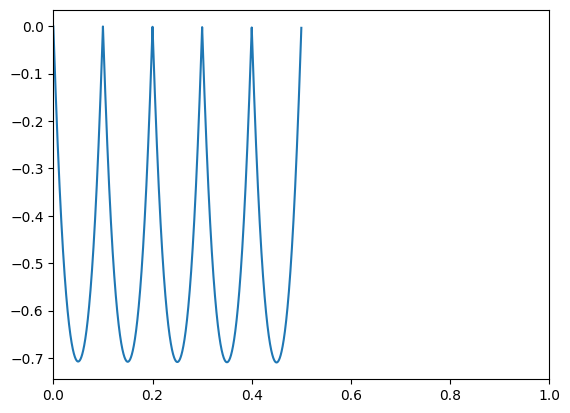

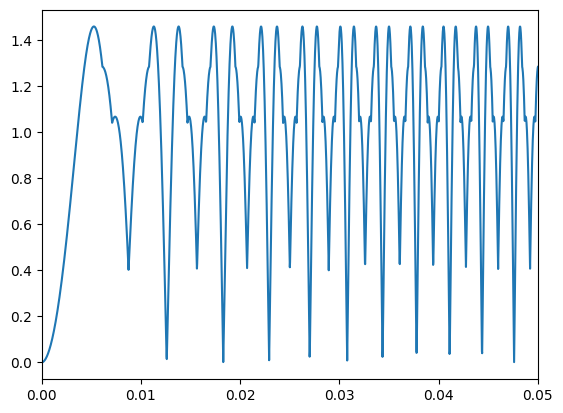

In [280]:

# Initialize PyAudio
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=SAMPLE_RATE,
                output=True)



try:
    while True:
        note_exist = False
        for note, freq in NOTE_FREQUENCIES.items():
            if keyboard.is_pressed(note):
                t, wave = play_sound(stream, freq)
                note_exist = True
                break  # Play only one note at a time
        if not note_exist:
            t, wave = generate_sine_wave(0)
except KeyboardInterrupt:
    pass

# Cleanup
stream.stop_stream()
stream.close()
p.terminate()